In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('fraud-detection/fraudTrain.csv')
train_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
test_df = pd.read_csv('fraud-detection/fraudTest.csv')
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
print(train_df.shape)
print(test_df.shape)

(1296675, 23)
(555719, 23)


In [5]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## About Dataset

This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

## Source of simulation

This was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. The files were combined and converted into a standard format.

## Column description

- `index` - Unique Identifier for each row
- `trans_date_trans_time` - Transaction DateTime
- `cc_num` - Credit Card Number of Customer
- `merchant` - Merchant Name
- `category` - Category of Merchant
- `amt` - Amount of Transaction
- `first` - First Name of Credit Card Holder
- `last` - Last Name of Credit Card Holder
- `gender` - Gender of Credit Card Holder
- `street` - Street Address of Credit Card Holder
- `city` - City of Credit Card Holder
- `state` - State of Credit Card Holder
- `zip` - Zip of Credit Card Holder
- `lat` - Latitude Location of Credit Card Holder
- `long` - Longitude Location of Credit Card Holder
- `city_pop` - Credit Card Holder's City Population
- `job` - Job of Credit Card Holder
- `dob` - Date of Birth of Credit Card Holder
- `trans_num` - Transaction Number
- `unix_time` - UNIX Time of transaction
- `merch_lat` - Latitude Location of Merchant
- `merch_long` - Longitude Location of Merchant
- `is_fraud` - Fraud Flag <--- `Target Class`

## Data Preprocessing

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
train_df.duplicated().sum()

0

In [9]:
np.round(train_df.describe(), 2)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.00,1.296675e+06,1296675.00,1296675.00,1296675.00,1296675.00,1296675.00,1.296675e+06,1296675.00,1296675.00,1296675.00
mean,648337.00,4.171920e+17,70.35,48800.67,38.54,-90.23,88824.44,1.349244e+09,38.54,-90.23,0.01
std,374317.97,1.308806e+18,160.32,26893.22,5.08,13.76,301956.36,1.284128e+07,5.11,13.77,0.08
min,0.00,6.041621e+10,1.00,1257.00,20.03,-165.67,23.00,1.325376e+09,19.03,-166.67,0.00
25%,324168.50,1.800429e+14,9.65,26237.00,34.62,-96.80,743.00,1.338751e+09,34.73,-96.90,0.00
50%,648337.00,3.521417e+15,47.52,48174.00,39.35,-87.48,2456.00,1.349250e+09,39.37,-87.44,0.00
75%,972505.50,4.642255e+15,83.14,72042.00,41.94,-80.16,20328.00,1.359385e+09,41.96,-80.24,0.00
max,1296674.00,4.992346e+18,28948.90,99783.00,66.69,-67.95,2906700.00,1.371817e+09,67.51,-66.95,1.00


In [10]:
np.round(train_df['amt'].describe(),2)

count    1296675.00
mean          70.35
std          160.32
min            1.00
25%            9.65
50%           47.52
75%           83.14
max        28948.90
Name: amt, dtype: float64

<Axes: >

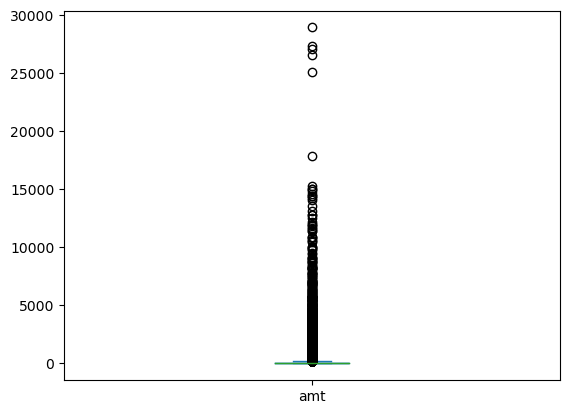

In [11]:
train_df['amt'].plot(kind='box')

## Issuses with the dataset

- Incorrect datatype of `trans_date_trans_time`, `dob`, `unix_time`

## EDA

In [12]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
train_df.rename(columns={"trans_date_trans_time":"transaction_time",
                         "cc_num":"credit_card_number",
                         "amt":"amount(usd)",
                         "trans_num":"transaction_id"},
                inplace=True)

In [15]:
train_df["transaction_time"] = pd.to_datetime(train_df["transaction_time"], infer_datetime_format=True)
train_df["dob"] = pd.to_datetime(train_df["dob"], infer_datetime_format=True)

In [16]:
from datetime import datetime

# Apply function utcfromtimestamp and drop column unix_time
train_df['time'] = train_df['unix_time'].apply(datetime.utcfromtimestamp)
train_df.drop('unix_time', axis=1)

# Add cloumn hour of day
train_df['hour_of_day'] = train_df.time.dt.hour

In [17]:
train_df[['time','hour_of_day']]

,time,hour_of_day
0,2012-01-01 00:00:18,0
1,2012-01-01 00:00:44,0
2,2012-01-01 00:00:51,0
3,2012-01-01 00:01:16,0
4,2012-01-01 00:03:06,0
...,...,...
1296670,2013-06-21 12:12:08,12
1296671,2013-06-21 12:12:19,12
1296672,2013-06-21 12:12:32,12
1296673,2013-06-21 12:13:36,12


In [18]:
train_df.credit_card_number = train_df.credit_card_number.astype('category')
train_df.is_fraud =train_df.is_fraud.astype('category')
train_df.hour_of_day = train_df.hour_of_day.astype('category')

In [19]:
train_df

,transaction_time,credit_card_number,merchant,category,amount(usd),first,last,gender,street,city,...,city_pop,job,dob,transaction_id,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2012-01-01 00:00:18,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2012-01-01 00:00:44,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2012-01-01 00:00:51,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2012-01-01 00:01:16,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2012-01-01 00:03:06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2013-06-21 12:12:08,12
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2013-06-21 12:12:19,12
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2013-06-21 12:12:32,12
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2013-06-21 12:13:36,12


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   transaction_time    1296675 non-null  datetime64[ns]
 1   credit_card_number  1296675 non-null  category      
 2   merchant            1296675 non-null  object        
 3   category            1296675 non-null  object        
 4   amount(usd)         1296675 non-null  float64       
 5   first               1296675 non-null  object        
 6   last                1296675 non-null  object        
 7   gender              1296675 non-null  object        
 8   street              1296675 non-null  object        
 9   city                1296675 non-null  object        
 10  state               1296675 non-null  object        
 11  zip                 1296675 non-null  int64         
 12  lat                 1296675 non-null  float64       
 13  long        

In [21]:
train_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

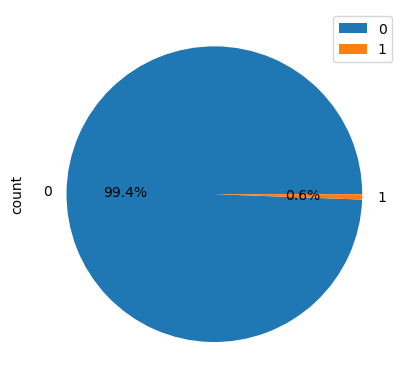

In [22]:
train_df['is_fraud'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.legend()

In [23]:
x = train_df['job'].value_counts().nlargest(10)
x

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
Designer, ceramics/pottery    8225
Systems developer             7700
IT trainer                    7679
Financial adviser             7659
Environmental consultant      7547
Name: count, dtype: int64

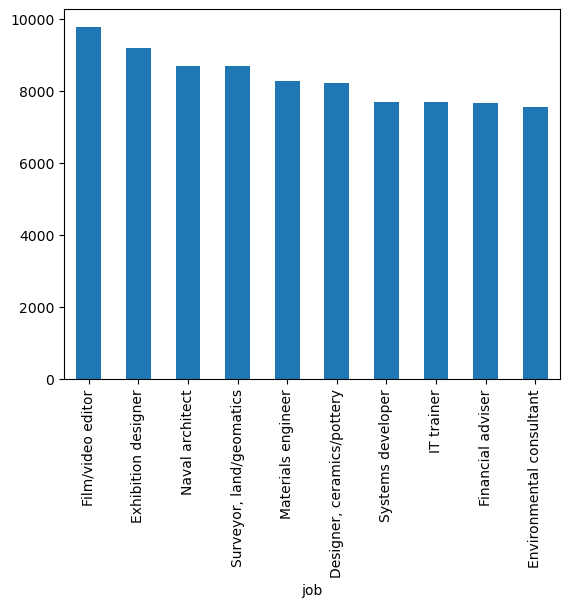

In [25]:
x.plot(kind='bar')
plt.show()

In [52]:
y = train_df['category'].value_counts()
y

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

<Axes: xlabel='category'>

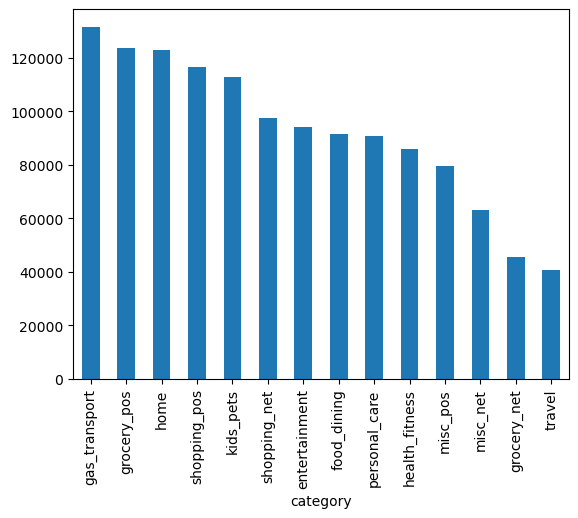

In [53]:
y.plot(kind='bar')

In [26]:
pd.crosstab(train_df['is_fraud'],train_df['hour_of_day'],normalize='columns')*100

hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
is_fraud,,,,,,,,,,,,,,,,,,,,,
0,98.505953,98.465091,98.53479,98.576071,99.890118,99.857722,99.905437,99.867308,99.884719,99.888586,...,99.867458,99.879188,99.884368,99.880825,99.877367,99.876351,99.904759,99.88708,97.117136,97.162613
1,1.494047,1.534909,1.46521,1.423929,0.109882,0.142278,0.094563,0.132692,0.115281,0.111414,...,0.132542,0.120812,0.115632,0.119175,0.122633,0.123649,0.095241,0.11292,2.882864,2.837387


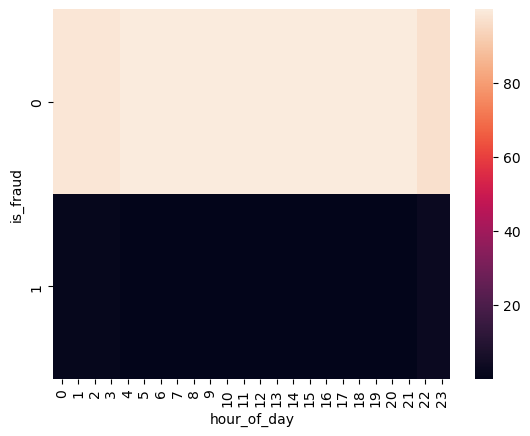

In [27]:
sns.heatmap(pd.crosstab(train_df['is_fraud'],train_df['hour_of_day'],normalize='columns')*100)
plt.show()

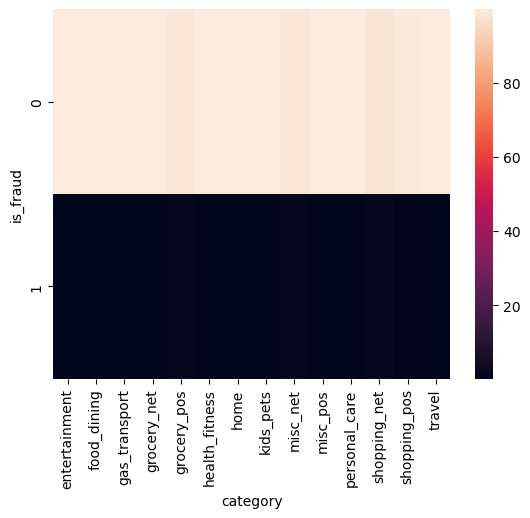

In [28]:
sns.heatmap(pd.crosstab(train_df['is_fraud'],train_df['category'],normalize='columns')*100)
plt.show()

## Smote algorithm 

In [31]:
features = ['transaction_id', 'hour_of_day', 'category', 'amount(usd)', 'merchant', 'job']

X = train_df[features].set_index("transaction_id")
y = train_df['is_fraud']

print('X shape:{}\ny shape:{}'.format(X.shape,y.shape))

X shape:(1296675, 5)
y shape:(1296675,)


In [34]:
from imblearn.over_sampling import SMOTEN
smote = SMOTEN(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [35]:
y_resampled.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int64)
enc.fit(X_resampled.loc[:,['category','merchant','job']])

X_resampled.loc[:, ['category','merchant','job']] = enc.transform(X_resampled[['category','merchant','job']])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [40]:
print('X_train shape:{}\ny_train shape:{}'.format(X_train.shape,y_train.shape))
print('X_test shape:{}\ny_test shape:{}'.format(X_test.shape,y_test.shape))

X_train shape:(2062670, 5)
y_train shape:(2062670,)
X_test shape:(515668, 5)
y_test shape:(515668,)


## Training, prediction and accuracy

In [41]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1 score:", f1_score)
print("AUC:", auc)

Accuracy: 0.998791858327451
F1 score: 0.9987944089991659
AUC: 0.998792849824554


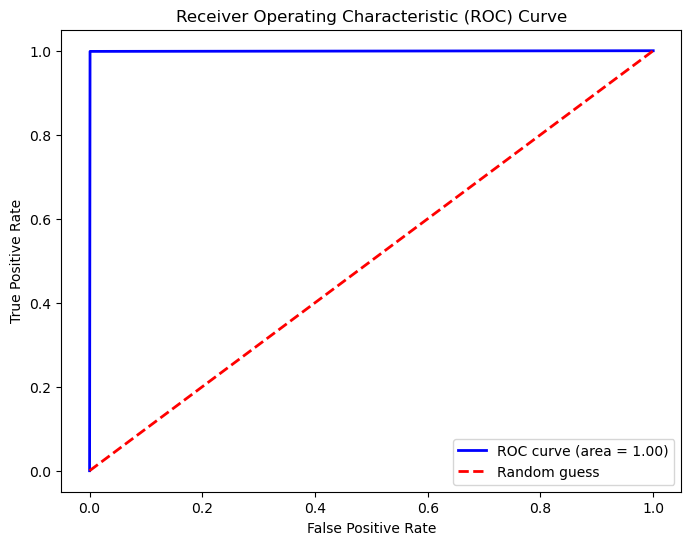

In [44]:
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257186
           1       1.00      1.00      1.00    258482

    accuracy                           1.00    515668
   macro avg       1.00      1.00      1.00    515668
weighted avg       1.00      1.00      1.00    515668



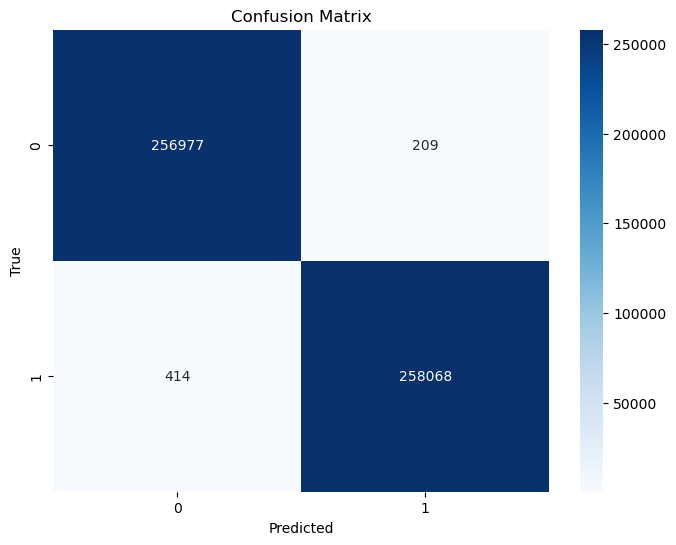

In [46]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
cfs_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cfs_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()